In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
file_path = 'Iris.csv'

In [ ]:
df = pd.read_csv(file_path)


# computing number of rows
rows = len(df.axes[0])

# computing number of columns
cols = len(df.axes[1])

print(df)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

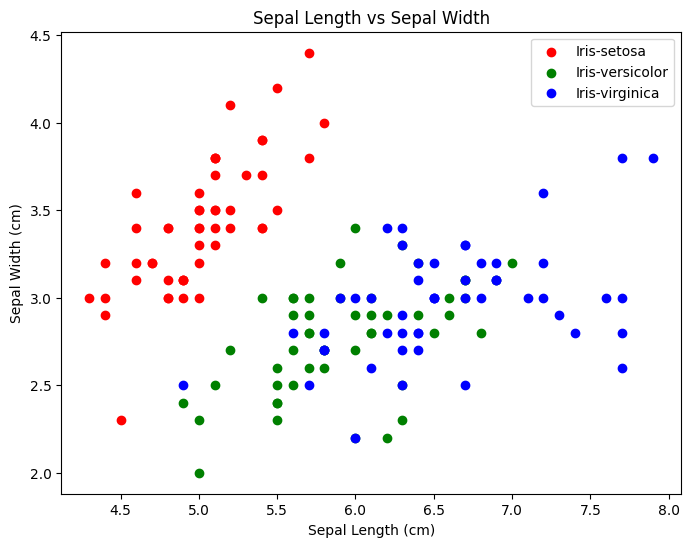

In [ ]:

# Define colors for different species
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for Sepal Length vs Sepal Width
for species, color in colors.items():
    plt.scatter(df[df['Species'] == species]['SepalLengthCm'], df[df['Species'] == species]['SepalWidthCm'], c=color, label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('Sepal Length vs Sepal Width')

plt.show()

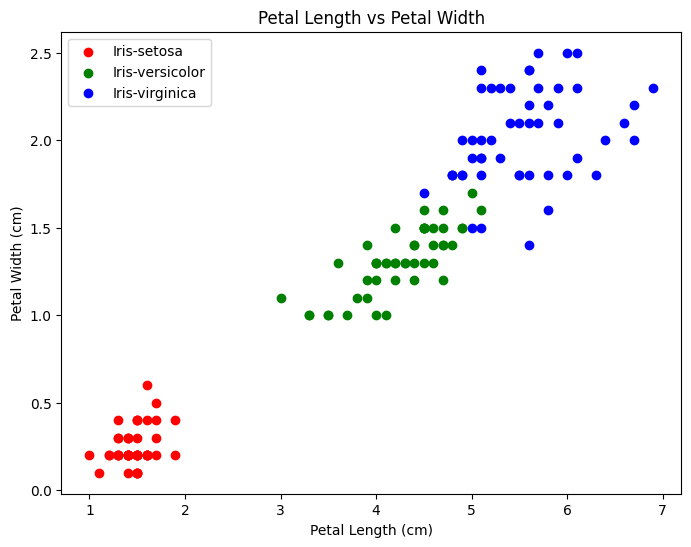

In [ ]:
import matplotlib.pyplot as plt
# Define colors for different species
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for Sepal Length vs Sepal Width
for species, color in colors.items():
    plt.scatter(df[df['Species'] == species]['PetalLengthCm'], df[df['Species'] == species]['PetalWidthCm'], c=color, label=species)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Petal Length vs Petal Width')

plt.show()

In [ ]:
iris =  datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
model = KMeans(n_clusters=3)
model.fit(X)
print('The accuracy score of K-Mean:', sm.accuracy_score(y, model.labels_))
print('The Confusion matrix of K-mean:', sm.confusion_matrix(y, model.labels_))

The accuracy score of K-Mean: 0.8933333333333333
The Confusion matrix of K-mean: [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)


StandardScaler()

In [ ]:
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_gmm = gmm.predict(xs)
print('The accuracy score of EM:', sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM:', sm.confusion_matrix(y, y_gmm))

if(sm.accuracy_score(y,y_gmm)>sm.accuracy_score(y, model.labels_)):
    print('EM Algorithm is better....')
else:
    print('K-means ALgorithm is better....')


The accuracy score of EM: 0.36666666666666664
The Confusion matrix of EM: [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]
K-means ALgorithm is better....


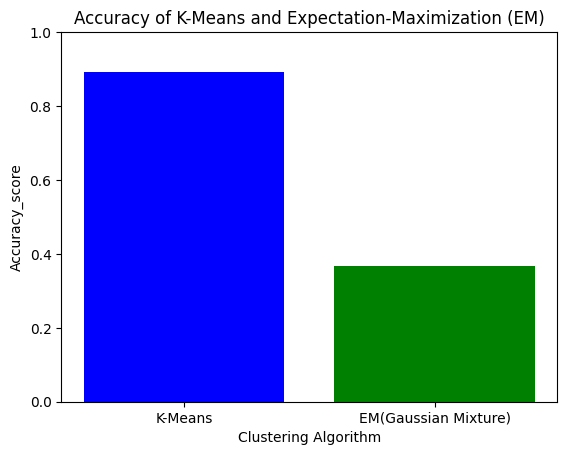

In [ ]:
labels = ['K-Means', 'EM(Gaussian Mixture)']
accuracy_scores = [sm.accuracy_score(y, model.labels_), sm.accuracy_score(y, y_gmm)]
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Clustering Algorithm')
plt.ylabel('Accuracy_score')
plt.title('Accuracy of K-Means and Expectation-Maximization (EM)')
plt.ylim(0, 1)
plt.show()